# Procesamiento y ajuste de datos mediante el uso de Python

El objetivo de este trabajo consiste en:

1.   Realizar el procesamiento de un set de datos de las operaciones de una cafetería mediante el uso del lenguaje programación Python y las bibliotecas Pandas y Numpy
2.   Obetener información necesaria del dataset con Pandas y desarrollar visualizaciones básicas de los datos mediante la librería MatPlotlib.
3.   Ajustar los datos de origen a una serie de funciones de densidad de probabilidad sugeridas, mediante el uso de la biblioteca Fitter.
4.   Con la obtención de la(s) fdp(s) sugeridas, simular un array de datos y verificar por medio de gráficos o un nuevo ajuste, que los datos generados son de características similares a los de orígen.

## 1. Importación de bibliotecas

En este primer paso importamos todas las bibliotecas necesarias para realizar nuestro procesamiento de datos. Numpy y Pandas para el manejo de datos y Matplotlib para gráficos.

Generalmente es buena práctica utilizar alias para los nombres de estas bibliotecas (np, pd y plt) cuando se las importa.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Carga de datos

Debido a que nuestro dataset a procesar es un archivo csv, utilizaremos la función *read_csv* de la biblioteca Pandas.

Los detalles del uso de esta función se encuentran en el siguiente link:
[pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

En este código de ejemplo, el archivo a leer se encuentra en una carpeta del proyecto.
En los parámetros que le pasamos a read_csv debemos poner el link de nuestra ubicación del archivo.

Los datos leídos los cargamos en una variable que llamamos *coffee_shop_sales_data_raw*.

Adicionalmente le pasamos como parámetro una opción para parsear las fechas en las columnas correspondientes al dataset.

In [3]:
# Atención: modificar la ubicación del archivo en donde lo tengan
coffee_shop_sales_data_raw = pd.read_csv("../data/raw/coffee_shop_sales.csv", parse_dates=[[1,2]], index_col=1)

Con la instrucción *type* podemos ver que esta última varible se trata de un *DataFrame* de Pandas.

In [4]:
type(coffee_shop_sales_data_raw)

pandas.core.frame.DataFrame

Podemos pensar a un DataFrame como una típica tabla que alguna vez utilizamos en un motor de bases de datos o simplemente en Excel.

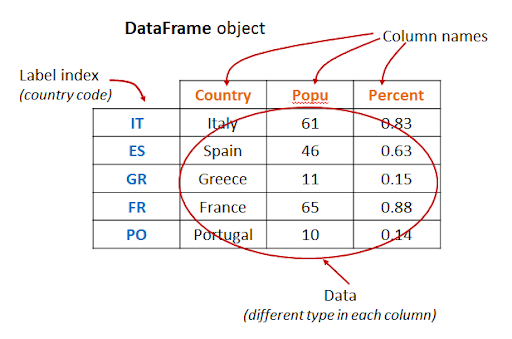

## 3. Análisis exploratorio de datos

### Dimensionalidad

Lo primero que podemos realizar con nuestro DataFrame es ver su "dimensionalidad" (Cantidad de filas por columnas).
Para ello utilizamos el atributo [*shape*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) de Pandas.

In [5]:
coffee_shop_sales_data_raw.shape

(149116, 16)

Ordenaremos los datos según la columna "transaction_id"

In [6]:
coffee_shop_sales_data = coffee_shop_sales_data_raw.sort_values(by=["transaction_id"], ascending=True)

Podemos ver el contenido de los primeros registros del DataFrame mediante la función  [*head()*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)

Podemos pasar como parámetro la cantidad de primeros x registros a ver. En el siguiente ejemplo, los 10 primeros:

In [7]:
coffee_shop_sales_data.head(10)

,transaction_date_transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
transaction_id,,,,,,,,,,,,,,,,
1,01-01-2023 07:06:11,5,Lower Manhattan,32,2,3.00,6.00,Coffee,Gourmet brewed coffee,Ethiopia,Regular,January,Sunday,7,1,6
2,01-01-2023 07:08:56,5,Lower Manhattan,57,2,3.10,6.20,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6
3,01-01-2023 07:14:04,5,Lower Manhattan,59,2,4.50,9.00,Drinking Chocolate,Hot chocolate,Dark chocolate,Large,January,Sunday,7,1,6
4,01-01-2023 07:20:24,5,Lower Manhattan,22,1,2.00,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6
5,01-01-2023 07:22:41,5,Lower Manhattan,57,2,3.10,6.20,Tea,Brewed Chai tea,Spicy Eye Opener Chai,Large,January,Sunday,7,1,6
6,01-01-2023 07:22:41,5,Lower Manhattan,77,1,3.00,3.00,Bakery,Scone,Oatmeal Scone,Not Defined,January,Sunday,7,1,6
7,01-01-2023 07:25:49,5,Lower Manhattan,22,1,2.00,2.00,Coffee,Drip coffee,Our Old Time Diner Blend,Small,January,Sunday,7,1,6
8,01-01-2023 07:33:34,5,Lower Manhattan,28,2,2.00,4.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast,Small,January,Sunday,7,1,6
9,01-01-2023 07:39:13,5,Lower Manhattan,39,1,4.25,4.25,Coffee,Barista Espresso,Latte,Regular,January,Sunday,7,1,6


### Tipos de datos
Oberservamos los tipos de datos de cada una de las columnas con el atributo [*dtypes*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html).

In [8]:
coffee_shop_sales_data.dtypes

transaction_date_transaction_time     object
store_id                               int64
store_location                        object
product_id                             int64
transaction_qty                        int64
unit_price                           float64
Total_Bill                           float64
product_category                      object
product_type                          object
product_detail                        object
Size                                  object
Month Name                            object
Day Name                              object
Hour                                   int64
Month                                  int64
Day of Week                            int64
dtype: object

### Inspección de datos nulos

Una forma de verificar si el DataFrame contiene datos nulos es mediante la función isnull(). Si agregarmos sum() obtenemos el total de nulos por columnas.
En nuestro dataset observamos que no tenemos datos nulos.

In [9]:
coffee_shop_sales_data.isnull().sum()

transaction_date_transaction_time    0
store_id                             0
store_location                       0
product_id                           0
transaction_qty                      0
unit_price                           0
Total_Bill                           0
product_category                     0
product_type                         0
product_detail                       0
Size                                 0
Month Name                           0
Day Name                             0
Hour                                 0
Month                                0
Day of Week                          0
dtype: int64

### Acceso a datos

Para acceder a los datos de una columna específica de un DataFrame podemos utilizar el operador punto (.), es decir ponemos el nombre del DF, más un . y el nombre de la columna. De esta manera:

In [10]:
coffee_shop_sales_data.transaction_date_transaction_time

transaction_id
1         01-01-2023 07:06:11
2         01-01-2023 07:08:56
3         01-01-2023 07:14:04
4         01-01-2023 07:20:24
5         01-01-2023 07:22:41
                 ...         
149452    30-06-2023 20:18:41
149453    30-06-2023 20:25:10
149454    30-06-2023 20:31:34
149455    30-06-2023 20:57:19
149456    30-06-2023 20:57:19
Name: transaction_date_transaction_time, Length: 149116, dtype: object

Esto último lo podemos hacer si el nombre de la columna no tiene espacios en su nombre. Si fuese así, podemos acceder a los datos de la columna mediante el uso de corchetes []., De esta manera:


In [11]:
coffee_shop_sales_data['transaction_date_transaction_time']

transaction_id
1         01-01-2023 07:06:11
2         01-01-2023 07:08:56
3         01-01-2023 07:14:04
4         01-01-2023 07:20:24
5         01-01-2023 07:22:41
                 ...         
149452    30-06-2023 20:18:41
149453    30-06-2023 20:25:10
149454    30-06-2023 20:31:34
149455    30-06-2023 20:57:19
149456    30-06-2023 20:57:19
Name: transaction_date_transaction_time, Length: 149116, dtype: object

## 4. Transformación de Datos

Debido a que el objetivo del análisis es conseguir la función de densidad de probabilidad del intervalo entre arribos, necesitamos primero hacer algunas transformaciones y filtros de los datos

En primer lugar vamos a filtrar los datos en base a las siguientes condiciones:
- Ventas de una sucursal específica, en este caso la que posee id 8
- Ventas de café

In [12]:
store_8_coffee_sales = coffee_shop_sales_data.loc[(coffee_shop_sales_data["store_id"] == 8) & (coffee_shop_sales_data["product_category"] == "Coffee")]
store_8_coffee_sales.shape

(20187, 16)

Ahora debemos obtener el intervalo entre pedidos de dicha sucursal. Agregaremos entonces una columna "time_lapse" que representa el tiempo transcurrido entre esa compra y la anterior

In [18]:
coffee_sales_with_time_lapse = store_8_coffee_sales.copy()

# Obtenemos las diferencias en tiempo
coffee_sales_with_time_lapse['transaction_date_transaction_time'] = pd.to_datetime(coffee_sales_with_time_lapse['transaction_date_transaction_time'], dayfirst=True)
coffee_sales_with_time_lapse['time_lapse'] = coffee_sales_with_time_lapse['transaction_date_transaction_time'].diff()

# Ponemos en 0 la primer compra de cada día para que sea más cercano al valor real el resultado final
coffee_sales_with_time_lapse['date'] = coffee_sales_with_time_lapse['transaction_date_transaction_time'].dt.date
first_transaction_idx = coffee_sales_with_time_lapse.groupby('date')['transaction_date_transaction_time'].idxmin()
coffee_sales_with_time_lapse.loc[first_transaction_idx, 'time_lapse'] = pd.Timedelta(seconds=0)
coffee_sales_with_time_lapse = coffee_sales_with_time_lapse.drop(columns=['date'])

# Ponemos el valor en minutos
coffee_sales_with_time_lapse['time_lapse_minutes'] = coffee_sales_with_time_lapse['time_lapse'].dt.total_seconds() / 60


In [70]:
coffee_sales_with_time_lapse.isnull().sum()

transaction_datetime    0
store_id                0
store_location          0
product_id              0
transaction_qty         0
unit_price              0
Total_Bill              0
product_category        0
product_type            0
product_detail          0
Size                    0
Month Name              0
Day Name                0
Hour                    0
Month                   0
Day of Week             0
time_lapse              0
time_lapse_minutes      0
dtype: int64

In [19]:
coffee_sales_with_time_lapse.head(3)

,transaction_date_transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week,time_lapse,time_lapse_minutes
transaction_id,,,,,,,,,,,,,,,,,,
21,2023-01-01 08:17:27,8,Hell's Kitchen,33,2,3.50,7.00,Coffee,Gourmet brewed coffee,Ethiopia,Large,January,Sunday,8,1,6,0 days 00:00:00,0.000000
25,2023-01-01 08:31:23,8,Hell's Kitchen,40,1,3.75,3.75,Coffee,Barista Espresso,Cappuccino,Not Defined,January,Sunday,8,1,6,0 days 00:13:56,13.933333
30,2023-01-01 08:41:57,8,Hell's Kitchen,40,2,3.75,7.50,Coffee,Barista Espresso,Cappuccino,Not Defined,January,Sunday,8,1,6,0 days 00:10:34,10.566667


En este análisis lo que haremos será evaluar la situación de la tienda de café para diferentes estaciones del año (inverno y primavera). Entonces partiremos en dos los datos según los meses correspondientes

In [20]:
winter_sales = coffee_sales_with_time_lapse[coffee_sales_with_time_lapse["Month Name"].isin(['January', 'February', 'March'])]
winter_sales.shape

(7457, 18)

In [21]:
spring_sales = coffee_sales_with_time_lapse[coffee_sales_with_time_lapse["Month Name"].isin(['April', 'May', 'June'])]
spring_sales.shape

(12730, 18)

## 5. Visualización de Datos

Es buena práctica recurrir a una visualización para obtener un panorama de la distribución de nuestros datos.

Recurrimos a la biblioteca [Matplotlib](https://matplotlib.org/) para graficar un histograma o gráfico de frecuencia.

Para construir este gráfico utilizamos la función hist de Matplotlib y pasamos como parámetros la columna con los valores que queremos contar) y la cantidad de rangos o bins que consideramos para nuestros datos. En este ejemplo tomamos 200.


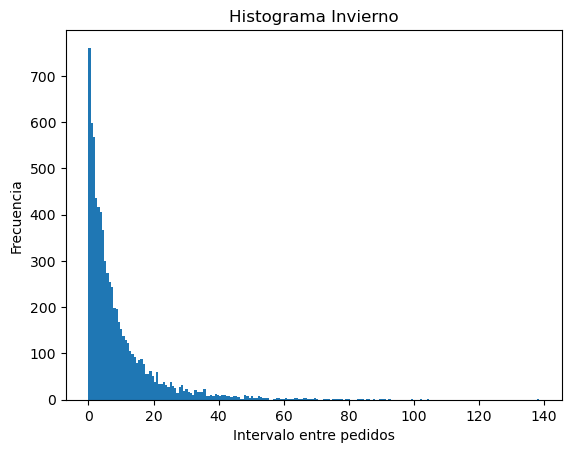

In [22]:
# Histograma de intervalo entre pedidos en invierno
plt.title("Histograma Invierno")
plt.xlabel("Intervalo entre pedidos")
plt.ylabel("Frecuencia")
plt.hist(winter_sales.time_lapse_minutes, bins=200)
plt.show()

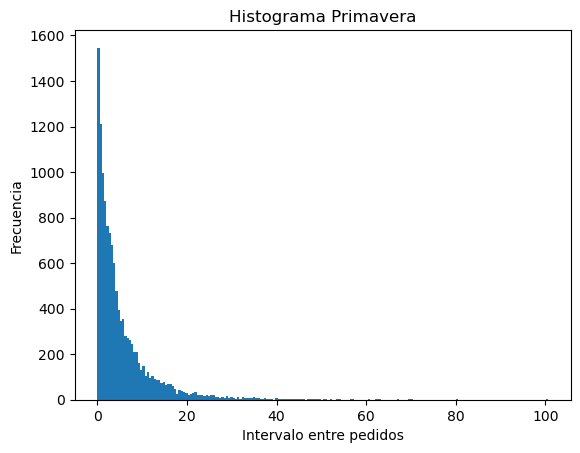

In [23]:
# Histograma de intervalo entre pedidos en invierno
plt.title("Histograma Primavera")
plt.xlabel("Intervalo entre pedidos")
plt.ylabel("Frecuencia")
plt.hist(spring_sales.time_lapse_minutes, bins=200)
plt.show()

## 6. Ajuste de Datos

Para poder ajustar nuestros datos a una fdp conocida es necesario que previamente instalemos en nuestro entorno Colab el paquete de la [librería Fitter](https://fitter.readthedocs.io/en/latest/).

La instalación se realiza fácilmente mediante la instrucción [*pip install*](https://pip.pypa.io/en/stable/cli/pip_install/).

Una vez instalado el paquete, se nos pedirá reiniciar el entorno de Colab.

In [24]:
pip install fitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Note: you may need to restart the kernel to use updated packages.


Ahora si podemos importar la [librería Fitter](https://fitter.readthedocs.io/en/latest/#what-is-it) propiamente.

In [25]:
#Importamos fitter
from fitter import Fitter

### 6.1 FDP para Invierno

Cargamos los datos de la columna de nuestro DataFrame que queremos ajustar en una variable que llamamos "f".

In [26]:
f_winter = Fitter(winter_sales.time_lapse_minutes)

**La** función fit() de Fitter ajusta los datos recorriendo más de 80 distribuciones disponibles de la biblioteca scipy que previamente importamos. Podríamos indicarle en forma de lista, distribuciones con las cuales queremos que realice la prueba de ajuste, si es que conocemos de antemano que nuestros datos ajustará a alguna de ellas. Por ejemplo así:

`fit(datos, distributions=['gamma','rayleigh','uniform'])`

Tener en cuenta que si no pasamos ningún parámetro, la función fit() escaneará las 80 funciones de scipy y demorará varios minutos en el proceso.

In [27]:
f_winter.fit()

2024-05-18 03:28:56.859 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-18 03:28:56.907 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.001314)
2024-05-18 03:28:57.553 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.010079)
2024-05-18 03:28:58.251 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.037611)
2024-05-18 03:28:58.698 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cosine distribution with error=0.035525)
2024-05-18 03:28:58.841 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.01323)
2024-05-18 03:28:59.443 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted dgamma distribution with error=0.011308)
2024-05-18 03:29:00.005 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fit

La función sumary():

`summary(Nbest=5, lw=2, plot=True, method='sumsquare_error', clf=True)`

grafica la distribución de las N mejores distribuciones.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
truncpareto,0.000064,1556.487744,1584.155378,inf,0.014751,7.714430e-02
pareto,0.000064,1554.613886,1575.364611,inf,0.014751,7.714427e-02
geninvgauss,0.000115,1914.771434,1942.439068,inf,0.029419,4.853035e-06
burr12,0.000221,1518.575192,1546.242826,inf,0.035178,1.878310e-08
mielke,0.000268,1548.955271,1576.622905,inf,0.059734,1.429196e-23
johnsonsb,0.000306,1589.583462,1617.251096,inf,0.026752,4.542714e-05
gengamma,0.000317,1670.168758,1697.836392,inf,0.035867,9.038950e-09
chi2,0.000342,1984.445800,2005.196525,inf,0.027138,3.328538e-05
genhyperbolic,0.000386,1733.874761,1768.459303,inf,0.885209,0.000000e+00
fatiguelife,0.000404,1622.467093,1643.217819,inf,0.031217,9.523112e-07


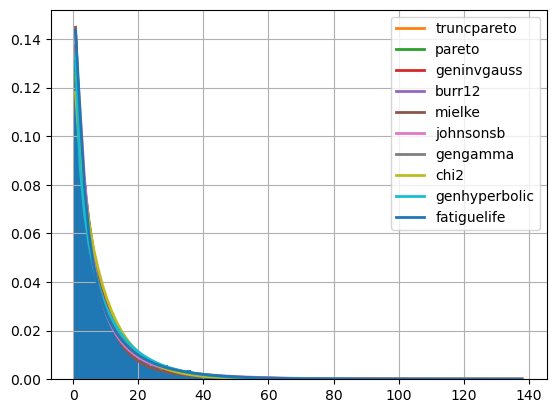

In [28]:
f_winter.summary(10)

Fitter me devuelve las mejores distribuciones de ajuste de acuerdo a distintos criterios *(sumsquare_error, aic,	bic, kl_div, ks_statistic,ks_pvalue)*.
Podemos por ejemplo obtener la mejor distribución, considerando el criterio de la [suma residual de cuadrados](https://es.wikipedia.org/wiki/Suma_residual_de_cuadrados).

In [29]:
# Obtengo los parámetros de la mejor fdp
f_winter.get_best(method='sumsquare_error')

{'truncpareto': {'b': 4.296655364961143,
  'c': 5.566743978454838,
  'loc': -30.35352117377835,
  'scale': 30.353521168839762}}

En este último ejemplo nos devuelve que la mejor distribución es la ["Truncpareto"](https://es.wikipedia.org/wiki/Distribución_de_Pareto).

No está demás que con cada distribución sugerida, consultemos la [documentación de la misma en Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncpareto.html).

La función de densidad de probabilidad de Truncpareto es:

$\begin{equation}f(x,b,c) = \frac{b}{1-c^{-b}}\frac{1}{x^{b+1}}
\end{equation}$  


Los 4 parámetros devueltos (*b, c, loc* y *scale*) corresponden **propriamente a esta función de distribución** y será de utilidad la hora de generar valores
aleatorios. Investigar en la documentación de Scipy los parámetros específicos de cada distribución con la que elijamos trabajar.

### 6.2 FDP para Primavera

Cargamos los datos de la columna de nuestro DataFrame que queremos ajustar en una variable que llamamos "f".

In [114]:
f_spring = Fitter(spring_sales.time_lapse_minutes)

**La** función fit() de Fitter ajusta los datos recorriendo más de 80 distribuciones disponibles de la biblioteca scipy que previamente importamos. Podríamos indicarle en forma de lista, distribuciones con las cuales queremos que realice la prueba de ajuste, si es que conocemos de antemano que nuestros datos ajustará a alguna de ellas. Por ejemplo así:

`fit(datos, distributions=['gamma','rayleigh','uniform'])`

Tener en cuenta que si no pasamos ningún parámetro, la función fit() escaneará las 80 funciones de scipy y demorará varios minutos en el proceso.

In [115]:
f_spring.fit()

2024-05-18 05:22:09.844 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-05-18 05:22:17.349 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.002887)
2024-05-18 05:22:20.550 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.09036)
2024-05-18 05:22:22.194 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.071201)
2024-05-18 05:22:24.508 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.097596)
2024-05-18 05:22:37.740 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.000662)
2024-05-18 05:22:47.800 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=0.000247)
2024-05-18 05:22:50.063 | INFO     | fitter.fitter:_fit_single_distribution:337 - F

La función sumary():

`summary(Nbest=5, lw=2, plot=True, method='sumsquare_error', clf=True)`

grafica la distribución de las N mejores distribuciones.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
betaprime,0.000247,1581.255270,1611.062137,inf,0.017642,7.153135e-04
halfgennorm,0.000254,1694.294201,1716.649351,inf,0.012124,4.700297e-02
pareto,0.000365,1587.409141,1609.764291,inf,0.015521,4.291914e-03
truncpareto,0.000371,1587.287389,1617.094255,inf,0.015820,3.380111e-03
burr12,0.000533,1637.971634,1667.778501,inf,0.038751,4.794431e-17
exponweib,0.000596,1903.411922,1933.218788,inf,0.048104,4.881585e-26
beta,0.000662,2094.989148,2124.796014,inf,0.024349,5.466503e-07
johnsonsb,0.001078,1634.010453,1663.817320,inf,0.032916,2.037803e-12
skewcauchy,0.001190,1338.241181,1360.596331,inf,0.053443,4.849634e-32
halfcauchy,0.001192,1336.341733,1351.245166,inf,0.053383,5.696924e-32


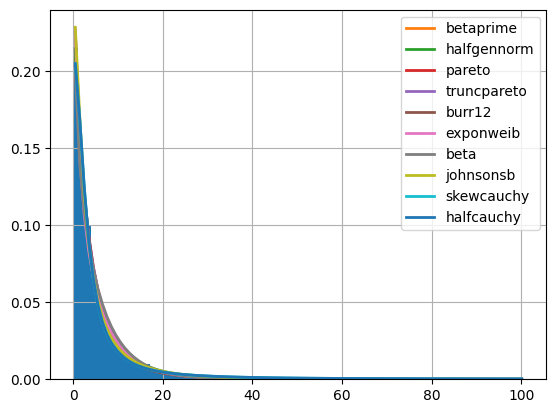

In [116]:
f_spring.summary(10)

Fitter me devuelve las mejores distribuciones de ajuste de acuerdo a distintos criterios *(sumsquare_error, aic,	bic, kl_div, ks_statistic,ks_pvalue)*.
Podemos por ejemplo obtener la mejor distribución, considerando el criterio de la [suma residual de cuadrados](https://es.wikipedia.org/wiki/Suma_residual_de_cuadrados).

In [117]:
# Obtengo los parámetros de la mejor fdp
f_spring.get_best(method='sumsquare_error')

{'betaprime': {'a': 0.9627545596022843,
  'b': 4.187081533279336,
  'loc': -2.746689009188662e-15,
  'scale': 17.975912393388512}}

En este último ejemplo nos devuelve que la mejor distribución es la ["Betaprime"](https://en.wikipedia.org/wiki/Beta_prime_distribution).

No está demás que con cada distribución sugerida, consultemos la [documentación de la misma en Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.betaprime.html).

La función de densidad de probabilidad de Betaprime es:

$\begin{equation}f(x,b,c) = \frac{x^{a-1}(x-1)^{-a-b}}{β(a,b)}
\end{equation}$  


Los 4 parámetros devueltos (*a, b, loc* y *scale*) corresponden **propriamente a esta función de distribución** y será de utilidad la hora de generar valores
aleatorios. Investigar en la documentación de Scipy los parámetros específicos de cada distribución con la que elijamos trabajar.

## 7. Verificación

### 7.1 Invierno

Los valores de los parámetros que nos había devuelto *get_best()* para la distribución Truncpareto, los cargamos en variables:

In [30]:
b = 4.296655364961143
c = 5.566743978454838
loc = -30.35352117377835
scale = 30.353521168839762

La idea es que mediante la [biblioteca de funciones estadística scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) generamos un array de datos con esta distribución:

In [31]:
f_verif = stats.truncpareto.rvs(b, c, loc, scale, size=4000, random_state=None)

Como mencionamos, el tipo de dato de esta variable creada es un array de numpy.

In [32]:
type(f_verif)

numpy.ndarray

En el parámetro size le indicamos que el tamaño de este array es de 4000.

De esta manera, pudimos "simular" un set de datos similar a los datos de origen con los cuales inciamos nuestro análisis.

In [33]:
f_verif

array([ 2.19899306,  3.33173443, 10.28183166, ...,  1.14508679,
        3.02934567,  1.06801449])

Una primera forma de verificar nuestro análisis es realizando un histograma con los datos generados:

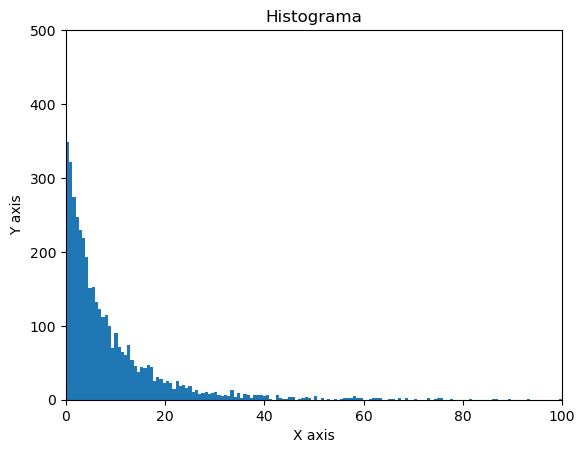

In [34]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.hist(f_verif, bins=200)
plt.show()

De la misma manera, si realizamos un buen análisis, aplicando los datos de verificación a Fitter debería ajustar a la función previamente sugerida:

In [35]:
v = Fitter(f_verif, distributions=['uniform', 'truncpareto','skewcauchy','norminvgauss'])

In [36]:
v.fit()

2024-05-18 03:33:54.125 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.043215)
2024-05-18 03:34:08.117 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted truncpareto distribution with error=6.2e-05)
2024-05-18 03:34:11.480 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewcauchy distribution with error=0.000435)
2024-05-18 03:34:23.888 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED norminvgauss distribution (taking more than 30 seconds)


2024-05-18 03:35:16.930 | WARNING  | fitter.fitter:plot_pdf:417 - norminvgauss was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
truncpareto,0.000062,1520.782881,1545.959080,inf,0.005510,9.996787e-01
skewcauchy,0.000435,1345.034371,1363.916520,inf,0.057765,4.818648e-12
uniform,0.043215,977.581992,990.170091,inf,0.740626,0.000000e+00
norminvgauss,inf,inf,inf,inf,NaN,NaN


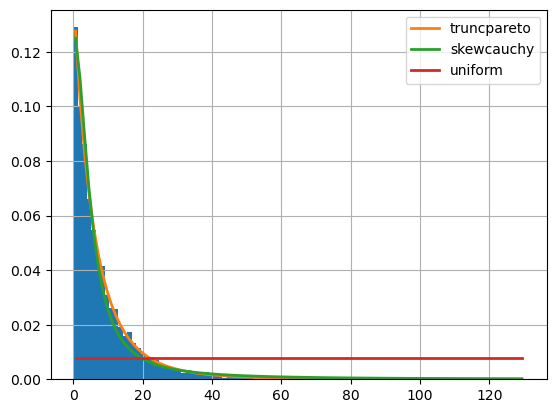

In [37]:
v.summary(6)

### 7.1 Primavera

Los valores de los parámetros que nos había devuelto *get_best()* para la distribución Truncpareto, los cargamos en variables:

In [118]:
a = 0.9627545596022843
b = 4.187081533279336
loc = -2.746689009188662e-15
scale = 17.975912393388512

La idea es que mediante la [biblioteca de funciones estadística scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) generamos un array de datos con esta distribución:

In [119]:
f_verif_spring = stats.betaprime.rvs(a, b, loc, scale, size=4000, random_state=None)

Como mencionamos, el tipo de dato de esta variable creada es un array de numpy.

In [120]:
type(f_verif_spring)

numpy.ndarray

En el parámetro size le indicamos que el tamaño de este array es de 4000.

De esta manera, pudimos "simular" un set de datos similar a los datos de origen con los cuales inciamos nuestro análisis.

In [121]:
f_verif_spring

array([2.61827134, 2.82740698, 2.51124644, ..., 6.45595011, 0.890831  ,
       6.08077864])

Una primera forma de verificar nuestro análisis es realizando un histograma con los datos generados:

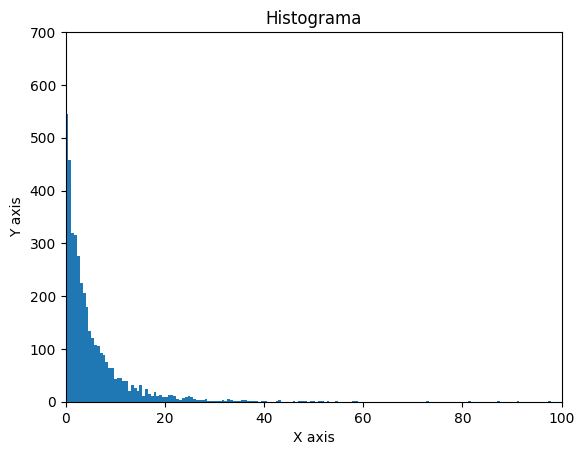

In [123]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 100)
plt.ylim(0, 700)
plt.hist(f_verif_spring, bins=200)
plt.show()

De la misma manera, si realizamos un buen análisis, aplicando los datos de verificación a Fitter debería ajustar a la función previamente sugerida:

In [124]:
v = Fitter(f_verif_spring, distributions=['uniform', 'betaprime','skewcauchy','norminvgauss'])

In [125]:
v.fit()

2024-05-18 06:02:25.802 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.088243)
2024-05-18 06:02:27.493 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted skewcauchy distribution with error=0.001051)
2024-05-18 06:02:39.230 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted betaprime distribution with error=0.000284)
2024-05-18 06:04:20.106 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norminvgauss distribution with error=0.001545)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
betaprime,0.000284,1654.692086,1679.868285,inf,0.011831,6.256794e-01
skewcauchy,0.001051,1393.819353,1412.701502,inf,0.050646,2.343720e-09
norminvgauss,0.001545,1646.704595,1671.880793,inf,0.037694,2.251237e-05
uniform,0.088243,951.850217,964.438316,inf,0.794006,0.000000e+00


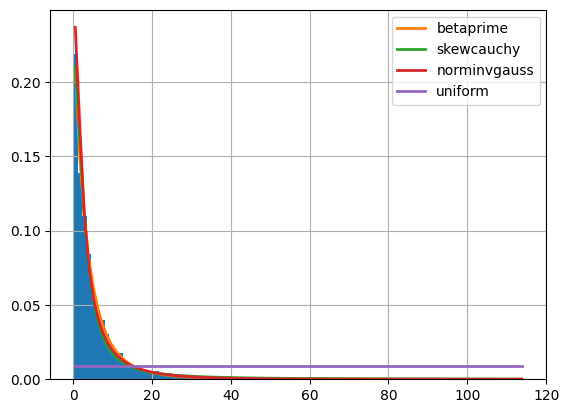

In [126]:
v.summary(6)

## 8. Conclusión

Observando el array de datos generados con la función de *stats.truncpareto* y posteriormente observando su distribución en el histograma podemos concluir sobre la similitud con los datos de origen.

Para ser mucho más exhaustivo podemos con este array simulado volver a ajustar los datos con Fitter como hicimos en la última parte del inciso 6, y entre la lista de funciones sugeridas por Fitter, vemos que nuevamente se encuentra la función *stats.truncpareto*.
